In [34]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

In [35]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["font.size"] = 12.0
plt.rcParams["figure.autolayout"] = True

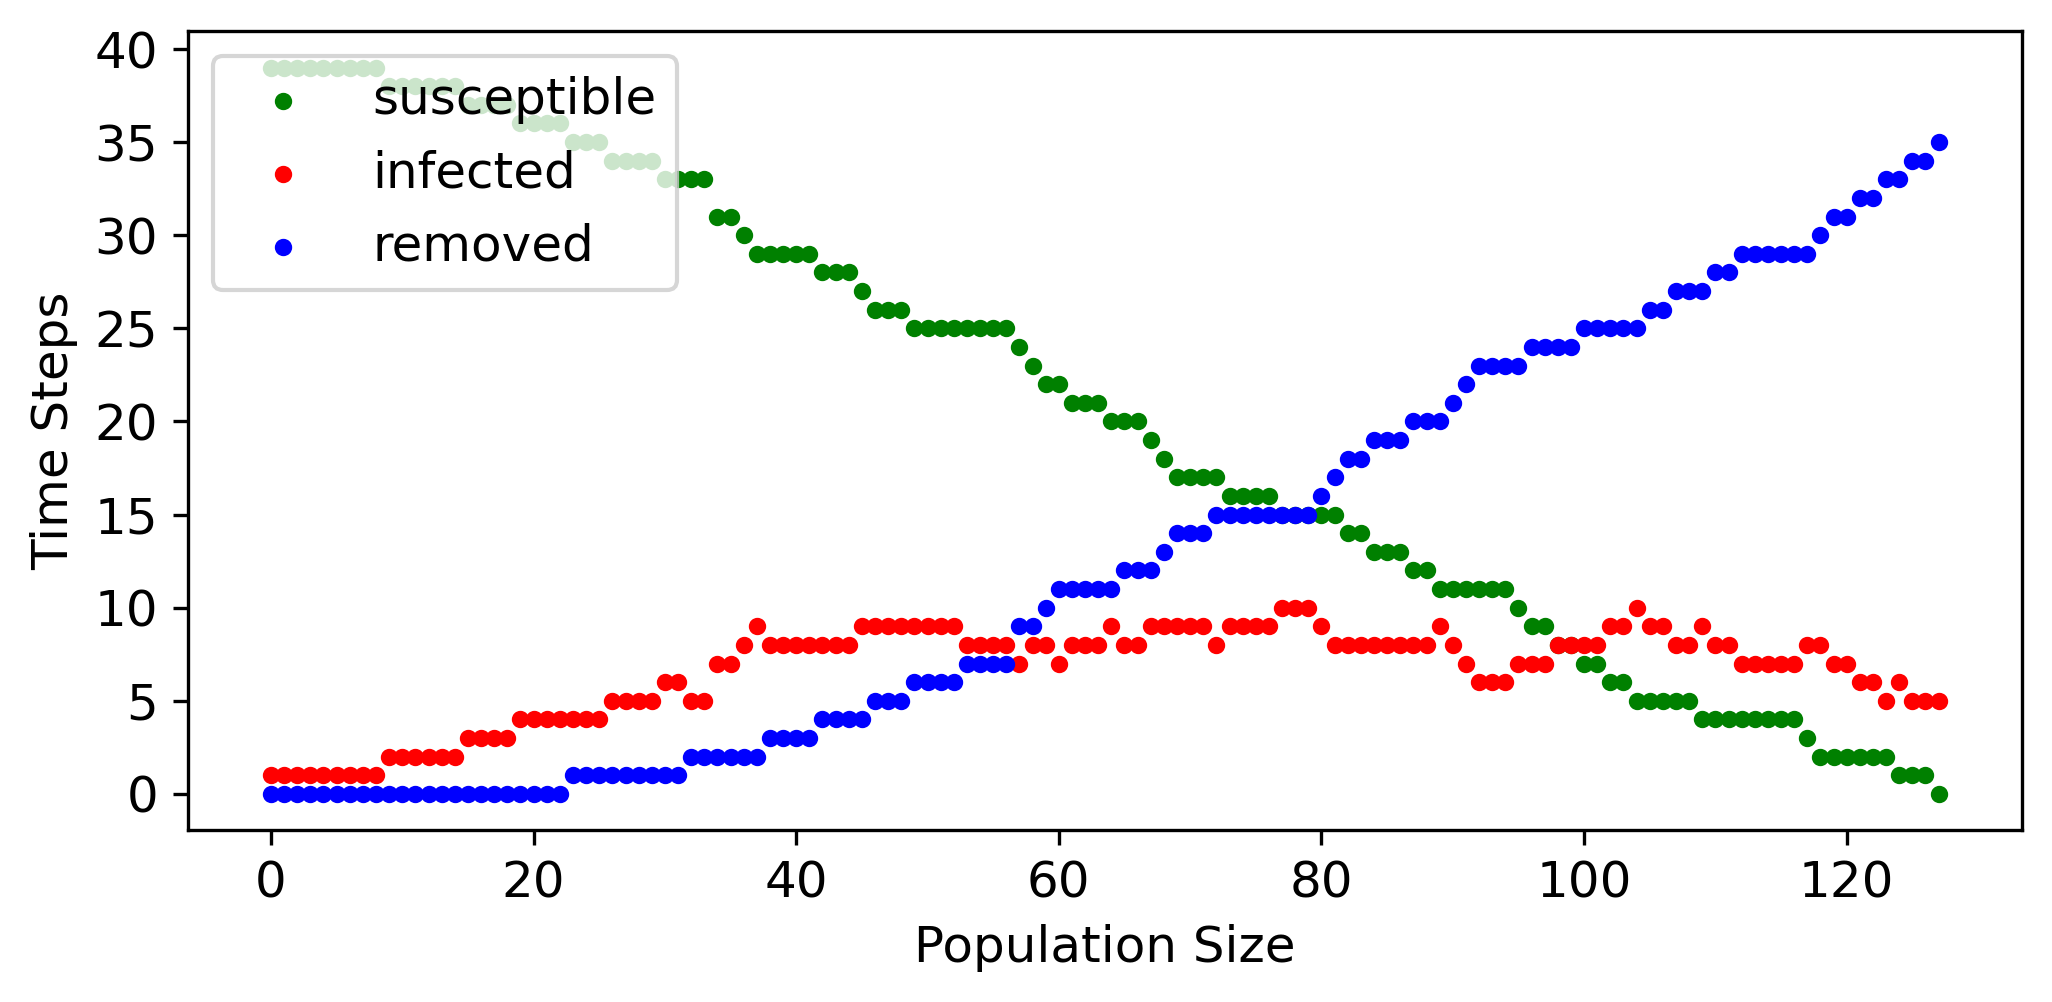

In [36]:
columns = ["t", "s", "i", "r"]
df = pd.read_csv("../../src/InfoWave.MonoGame/bin/Debug/net7.0/data.csv", usecols=columns)

fig = plt.figure(dpi=300)
ax1 = fig.add_subplot(111)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

ax1.scatter(df.t, df.s, s=10, c='g', marker="o", label='susceptible')
ax1.scatter(df.t, df.i, s=10, c='r', marker="o", label='infected')
ax1.scatter(df.t, df.r, s=10, c='b', marker="o", label='removed')

plt.legend(loc='upper left')
plt.xlabel("Population Size")
plt.ylabel("Time Steps")
# plt.show()
plt.savefig("sir.png", format="png", transparent=True, bbox_inches="tight")

In [59]:
from PIL import Image
import os
import re

In [70]:
pattern = re.compile("sir_\d+\.png")
paths = [
    "../../../master-thesis/images/chapter2/sir0",
    "../../../master-thesis/images/chapter2/sir2",
    "../../../master-thesis/images/chapter2/sir3"
]
for path in paths:
    for file in os.listdir(path):
        if not pattern.match(file): continue
        im = Image.open(f"{path}/{file}")
        cropped = im.crop((1, 1, 1537, 769))
        cropped.save(f"{path}/{file}")

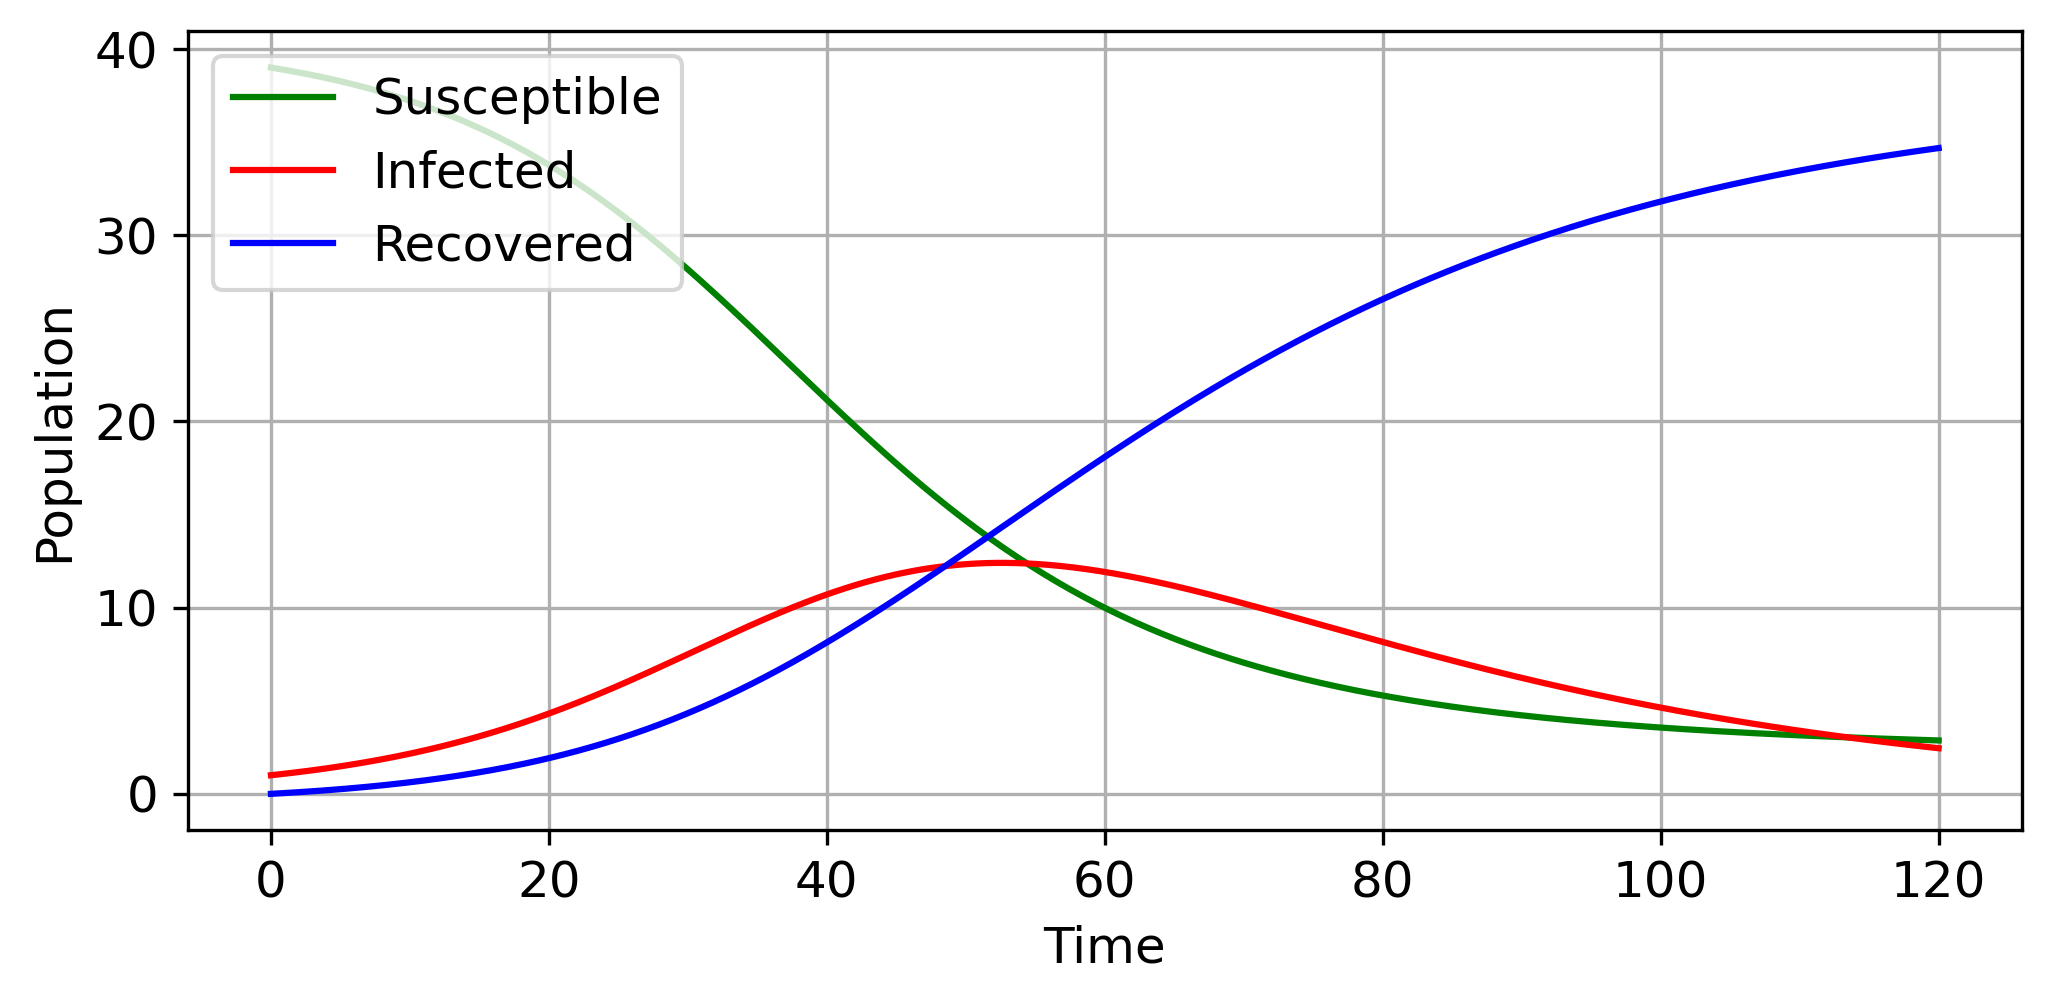

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 0.03  # Infection rate
gamma = 0.01  # Recovery rate
N = 40  # Total population size

# Initial conditions
S0 = N - 1  # Initial number of susceptible individuals
I0 = 1  # Initial number of infected individuals
R0 = 0  # Initial number of recovered individuals

# Time vector
t = np.linspace(0, 120, 500)  # Time span

# Function for solving the SIR model equations
def solve_sir_model(S, I, R, beta, gamma):
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Solve the SIR model equations
S, I, R = [S0], [I0], [R0]
for i in range(1, len(t)):
    dSdt, dIdt, dRdt = solve_sir_model(S[i-1], I[i-1], R[i-1], beta, gamma)
    S.append(S[i-1] + dSdt)
    I.append(I[i-1] + dIdt)
    R.append(R[i-1] + dRdt)

# Plotting
fig = plt.figure(dpi=300)
plt.plot(t, S, label='Susceptible', c='g')
plt.plot(t, I, label='Infected', c='r')
plt.plot(t, R, label='Recovered', c='b')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig("sir_1.png", format="png", transparent=True, bbox_inches="tight")
